In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from python_tsp.exact import solve_tsp_dynamic_programming
import sympy as sy
from scipy.integrate import quad
from scipy.special import erfc
import ipywidgets as widgets,interactive_output
from IPython.display import display

1

In [ ]:
v_th = 15
v_r = 0
g = 0.1
mu = 2
sigma = 2
def bound(v_th,v_r,g,mu,sigma):
    return [(v_th*g-mu)/(np.sqrt(g)*sigma),(v_r*g-mu)/(np.sqrt(g)*sigma)]
def exp_int(x):
    return np.exp(x**2)*erfc(-x)
def expactaction(v_th,v_r,g,mu,sigma):
    u, l = bound(v_th,v_r,g,mu,sigma)
    res = quad(exp_int,l,u)[0]*np.sqrt(np.pi)*g
    return res

In [ ]:
def integrand(x, y): 
    return np.exp(-x ** 2 + y ** 2)

def y_integral(x):
    # Note scipy will pass args as the second argument
    # we can fiddle it to work correctly, but by symmetry we don't need to here.
    return quad(integrand, -1000, x, args=(x))[0]
res = quad(y_integral, -0.8, 3.2) 
print(res) 
def int_y(y):
    return np.exp(-y**2)
def int_x(x):
    return np.exp(x**2)*quad(int_y,-1000,x)[0]
res = quad(int_x,-3.16,-0.79)

In [ ]:
def f(y,v):
    a = v**2/2-y**2
    return np.exp(a)
def dm(v):
    return quad(f,-1000,v,args=(v))[0]
def int_y(x):
    return quad(dm,-1000,x)[0]
def int_x(x):
    return np.exp(x**2)*int_y(x)
def var(v_th,v_r,g,mu,sigma):
    u, l = bound(v_th,v_r,g,mu,sigma)
    res = quad(int_x,l,u)[0]*8/g
    return res

2

In [4]:
def dif(y, t, I):
    v, m, h, n = y
    am = 0.1*(25-v)/(np.exp((25-v)/10)-1)
    bm = 4*np.exp(-v/18)
    ah = 0.07*np.exp(-v/20)
    bh = 1/(np.exp((30-v)/10)+1)
    an = 0.01*(10-v)/(np.exp((10-v)/10)-1)
    bn = 0.125*np.exp(-v/80)
    dv = I - 120*m**3*h*(v-115)-36*n**4*(v+12)-0.3*(v-10.599)
    dm = (am*(1-m)-bm*m)
    dh = (ah*(1-h)-bh*h)
    dn = (an*(1-n)-bn*n)
    return [dv,dm,dh,dn]

In [5]:
y_0 = [0,0,0,0]
t = np.linspace(0, 300, 3001)
I = 160
sol = odeint(dif, y_0, t, args=(I, ))

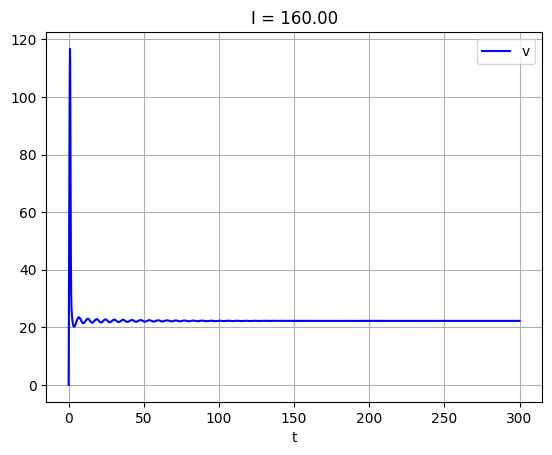

In [6]:
plt.plot(t, sol[:, 0], 'b', label='v')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('I = %.2f'%(I))
plt.grid()
plt.show()

4

In [7]:
taue = 1
taui = 3

In [8]:
def dif(v, t, taue, taui):
    ve, vi = v
    dve = (-ve+max(0,2*ve-2*vi+1))/taue
    dvi = (-vi+max(0,2*ve-2*vi+1))/taui
    return [dve,dvi]

In [9]:
v_0 = [2,2]
t = np.linspace(0, 100, 1001)

In [10]:
taue = 1
taui = 9
sol = odeint(dif, v_0, t, args=(taue, taui))

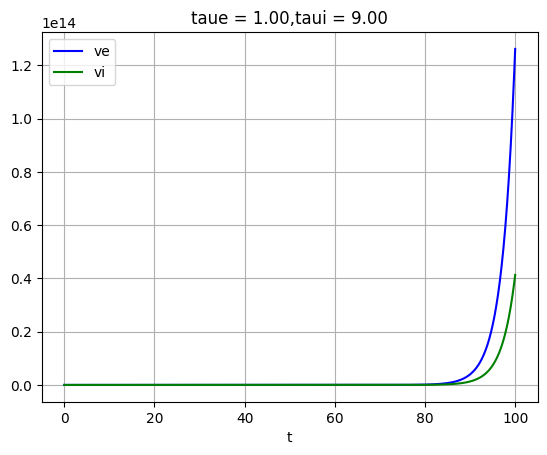

In [11]:
plt.plot(t, sol[:, 0], 'b', label='ve')
plt.plot(t, sol[:, 1], 'g', label='vi')
plt.legend(loc='best')
plt.xlabel('t')
plt.title('taue = %.2f,taui = %.2f'%(taue, taui))
plt.grid()
plt.show()

5

In [12]:
distance_matrix = np.array([[0,5,4,10,3,20],
                    [5,0,8,5,2,10],
                    [4,8,0,3,1,3],
                    [10,5,3,0,4,5],
                    [3,2,1,4,0,6],
                    [20,10,3,5,6,0]])
N = len(distance_matrix)

In [13]:
def HNN(u,distance):
    V = 1/(1+np.exp(-u*100))
    du = np.zeros([N,N])
    for x in range(N):
        for i in range(N):
            du[x,i] -= 100*(np.sum(V[x,:])-V[x,i])
            du[x,i] -= 100*(np.sum(V[:,i])-V[x,i])
            du[x,i] -= 100*(np.sum(V[x,:])+np.sum(V[:,i])-2)
            if i == 0:
                for y in range(N):
                    du[x,i] -= distance[x,y]*(V[y,i+1]+V[y,N-1])
            elif i == N-1:
                for y in range(N):
                    du[x,i] -= distance[x,y]*(V[y,i-1]+V[y,0])
                    #du[x,i] -= distance[x,y]*V[y,i-1]
            else:
                for y in range(N):
                    du[x,i] -= distance[x,y]*(V[y,i-1]+V[y,i+1])
                    #du[x,i] -= distance[x,y]*V[y,i+1]
    return u+du*0.01

In [14]:
distance_list = []
for i in range(10):
    d = 0
    u = np.random.rand(N,N)*2-1
    for _ in range(1000):
        u = HNN(u,distance_matrix)
    V = 1/(1+np.exp(-u*100))
    path = np.argmax(V,axis=1)
    for i in range(N-1):
        d += distance_matrix[path[i],path[i+1]]
    d += distance_matrix[path[N-1],path[0]]
    distance_list.append(d)
print(np.sum(distance_list)/10)

C:\Users\25292\AppData\Local\Temp\ipykernel_19192\2011233483.py:2: RuntimeWarning: overflow encountered in exp
  V = 1/(1+np.exp(-u*100))
C:\Users\25292\AppData\Local\Temp\ipykernel_19192\64358360.py:7: RuntimeWarning: overflow encountered in exp
  V = 1/(1+np.exp(-u*100))


35.1


In [15]:
distance_list

[37, 41, 35, 29, 27, 42, 42, 35, 33, 30]

In [16]:
permutation, distance = solve_tsp_dynamic_programming(distance_matrix)

In [17]:
distance

22

6

In [60]:
maze = [[1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,1,1],
        [1,0,0,0,0, 0,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0,
         0,0,1,0,0, 0,1,0,0,0, 1,0,0,0,0, 0,0,0,1,0,
         0,0,0,0,0, 0,1,0,0,0, 0,0,1,0,0, 0,1,0,0,0,
         0,0,0,0,1],
        [1,0,1,0,1, 0,1,1,1,1, 1,0,1,1,1, 1,1,1,1,1,
         1,0,1,0,1, 1,1,0,1,0, 1,0,1,1,1, 0,1,0,1,1,
         1,1,1,0,1, 0,1,0,1,1, 1,0,1,0,1, 1,1,0,1,0,
         1,1,1,0,1],
        [1,0,1,0,1, 0,0,0,0,0, 1,0,1,0,0, 0,1,0,0,0,
         1,0,1,0,0, 0,0,0,1,0, 0,0,0,0,1, 0,1,0,0,0,
         1,0,0,0,1, 0,0,0,1,0, 0,0,1,0,0, 0,0,0,1,0,
         1,0,0,0,1],
        [1,0,1,0,1, 1,1,1,1,0, 1,0,1,0,1, 0,1,0,1,0,
         1,0,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 0,1,1,1,0,
         1,0,1,1,1, 0,1,1,1,1, 1,0,1,0,1, 1,1,1,1,0,
         1,1,1,1,1],
        
        [1,0,1,0,1, 0,0,0,0,0, 1,0,0,0,1, 0,1,0,1,0,
         1,0,0,0,1, 0,0,0,0,0, 0,0,0,0,1, 0,1,0,0,0,
         1,0,0,0,1, 0,1,0,0,0, 1,0,1,0,0, 0,0,0,1,0,
         1,0,0,0,1],
        [1,0,1,0,1, 1,1,1,1,0, 1,1,1,1,1, 0,1,0,1,0,
         1,1,1,0,1, 0,1,1,1,1, 1,1,1,0,1, 0,1,0,1,1,
         1,0,1,0,1, 1,1,0,1,0, 1,0,1,1,1, 1,1,1,1,0,
         1,0,1,0,1],
        [1,0,1,0,1, 0,0,0,1,0, 0,0,0,0,1, 0,0,0,1,0,
         1,0,1,0,1, 0,0,0,1,0, 0,0,1,0,1, 0,1,0,1,0,
         0,0,1,0,1, 0,0,0,1,0, 1,0,0,0,0, 0,0,0,1,0,
         0,0,1,0,1],
        [1,0,1,0,1, 0,1,0,1,1, 1,1,1,0,1, 0,1,1,1,0,
         1,0,1,0,1, 1,1,0,1,0, 1,0,1,0,1, 0,1,0,1,1,
         1,1,1,0,1, 0,1,1,1,0, 1,1,1,1,1, 1,1,0,1,1,
         1,1,1,0,1],
        [1,0,1,0,0, 0,1,0,1,0, 1,0,0,0,1, 0,0,0,1,0,
         1,0,1,0,1, 0,0,0,1,0, 1,0,1,0,1, 0,1,0,1,0,
         0,0,1,0,1, 0,1,0,1,0, 1,0,0,0,0, 0,0,0,0,0,
         0,0,0,0,1],
        
        [1,1,1,1,1, 0,1,0,1,0, 1,0,1,1,1, 1,1,0,1,0,
         1,0,1,0,1, 0,1,1,1,1, 1,0,1,0,1, 0,1,0,1,0,
         1,0,1,0,1, 0,1,0,1,0, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,0,1],
        [1,0,0,0,1, 0,1,0,1,0, 1,0,1,0,0, 0,1,0,1,0,
         1,0,0,0,1, 0,1,0,0,0, 1,0,0,0,1, 0,1,0,0,0,
         1,0,1,0,0, 0,0,0,1,0, 1,0,0,0,0, 0,1,0,0,0,
         1,0,0,0,1],
        [1,0,1,0,1, 0,1,0,1,0, 1,0,1,0,1, 0,1,0,1,0,
         1,0,1,1,1, 0,1,0,1,0, 1,0,1,1,1, 0,1,1,1,1,
         1,0,1,1,1, 1,1,1,1,0, 1,0,1,1,1, 0,1,0,1,1,
         1,0,1,1,1],
        [1,0,1,0,1, 0,1,0,1,0, 0,0,1,0,1, 0,1,0,1,0,
         1,0,0,0,1, 0,0,0,1,0, 1,0,0,0,1, 0,0,0,0,0,
         1,0,0,0,0, 0,0,0,1,0, 1,0,1,0,1, 0,1,0,0,0,
         0,0,1,0,1],
        [1,0,1,0,1, 1,1,0,1,0, 1,1,1,0,1, 1,1,0,1,0,
         1,1,1,0,1, 0,1,1,1,0, 1,1,1,0,1, 0,1,1,1,0,
         1,1,1,1,1, 1,1,0,1,0, 1,0,1,0,1, 0,1,0,1,1,
         1,1,1,0,1],
        
        [1,0,1,0,0, 0,0,0,1,0, 1,0,0,0,1, 0,0,0,1,0,
         1,0,1,0,1, 0,0,0,1,0, 1,0,1,0,1, 0,1,0,1,0,
         1,0,0,0,1, 0,0,0,1,0, 0,0,1,0,1, 0,1,0,1,0,
         0,0,0,0,1],
        [1,0,1,1,1, 1,1,1,1,0, 1,1,1,0,1, 0,1,1,1,0,
         1,0,1,0,1, 1,1,1,1,0, 1,0,1,0,1, 0,1,0,1,0,
         1,0,1,1,1, 0,1,1,1,1, 1,0,1,0,1, 0,1,0,1,1,
         1,1,1,0,1],
        [1,0,0,0,0, 0,0,0,1,0, 0,0,1,0,1, 0,1,0,1,0,
         1,0,1,0,1, 0,0,0,1,0, 1,0,1,0,1, 0,0,0,1,0,
         1,0,0,0,0, 0,1,0,0,0, 1,0,1,0,1, 0,1,0,0,0,
         0,0,1,0,1],
        [1,1,1,1,1, 1,1,0,1,1, 1,0,1,0,1, 0,1,0,1,0,
         1,0,1,0,1, 0,1,0,1,0, 1,0,1,0,1, 1,1,1,1,0,
         1,1,1,0,1, 1,1,0,1,0, 1,0,1,0,1, 0,1,1,1,1,
         1,0,1,0,1],
        [1,0,0,0,0, 0,1,0,0,0, 1,0,1,0,0, 0,0,0,1,0,
         1,0,0,0,1, 0,1,0,0,0, 1,0,0,0,0, 0,0,0,1,0,
         0,0,1,0,0, 0,1,0,1,0, 1,0,0,0,1, 0,1,0,0,0,
         0,0,1,0,1],
        
        [1,0,1,1,1, 0,1,1,1,0, 1,0,1,1,1, 1,1,1,1,0,
         1,0,1,1,1, 0,1,1,1,1, 1,1,1,1,1, 1,1,0,1,0,
         1,0,1,1,1, 0,1,0,1,0, 1,1,1,1,1, 0,1,1,1,0,
         1,1,1,0,1],
        [1,0,0,0,1, 0,1,0,0,0, 1,0,0,0,0, 0,1,0,0,0,
         1,0,0,0,1, 0,0,0,0,0, 0,0,1,0,0, 0,1,0,1,0,
         1,0,1,0,1, 0,1,0,1,0, 0,0,0,0,1, 0,0,0,1,0,
         1,0,0,0,1],
        [1,1,1,0,1, 0,1,0,1,1, 1,1,1,1,1, 0,1,0,1,1,
         1,1,1,0,1, 1,1,1,1,0, 1,0,1,0,1, 1,1,0,1,0,
         1,0,1,0,1, 0,1,0,1,1, 1,1,1,0,1, 1,1,0,1,0,
         1,0,1,1,1],
        [1,0,0,0,1, 0,0,0,1,0, 0,0,0,0,1, 0,1,0,0,0,
         0,0,1,0,0, 0,0,0,1,0, 1,0,1,0,0, 0,0,0,1,0,
         1,0,1,0,0, 0,1,0,0,0, 1,0,0,0,0, 0,0,0,1,0,
         1,0,0,0,1],
        [1,0,1,1,1, 1,1,1,1,0, 1,1,1,0,1, 0,1,1,1,1,
         1,0,1,1,1, 1,1,0,1,1, 1,0,1,1,1, 0,1,1,1,0,
         1,0,1,0,1, 1,1,1,1,0, 1,0,1,1,1, 1,1,1,1,0,
         1,1,1,0,1],
        
        [1,0,0,0,0, 0,1,0,0,0, 1,0,1,0,1, 0,0,0,0,0,
         0,0,1,0,0, 0,0,0,1,0, 0,0,1,0,1, 0,1,0,1,0,
         1,0,1,0,1, 0,0,0,1,0, 1,0,0,0,1, 0,0,0,1,0,
         0,0,0,0,1],
        [1,1,1,1,1, 0,1,0,1,1, 1,0,1,0,1, 0,1,1,1,1,
         1,1,1,1,1, 0,1,1,1,0, 1,0,1,0,1, 0,1,0,1,0,
         1,0,1,0,1, 0,1,0,1,0, 1,1,1,0,1, 0,1,0,1,0,
         1,1,1,1,1],
        [1,0,0,0,1, 0,0,0,0,0, 0,0,1,0,1, 0,1,0,0,0,
         0,0,0,0,1, 0,1,0,0,0, 1,0,1,0,1, 0,1,0,0,0,
         1,0,1,0,0, 0,1,0,1,0, 1,0,0,0,1, 0,1,0,1,0,
         1,0,0,0,1],
        [1,0,1,0,1, 1,1,1,1,1, 1,0,1,0,1, 0,1,0,1,1,
         1,1,1,0,1, 0,1,0,1,1, 1,1,1,0,1, 0,1,1,1,1,
         1,0,1,1,1, 1,1,0,1,0, 1,1,1,1,1, 0,1,0,1,0,
         1,0,1,0,1],
        [1,0,1,0,0, 0,1,0,0,0, 0,0,1,0,1, 0,1,0,1,0,
         0,0,1,0,1, 0,1,0,1,0, 0,0,0,0,1, 0,0,0,0,0,
         1,0,0,0,0, 0,1,0,1,0, 0,0,1,0,0, 0,1,0,1,0,
         1,0,1,0,1],
        
        [1,0,1,1,1, 0,1,1,1,1, 1,1,1,0,1, 0,1,0,1,0,
         1,1,1,0,1, 0,1,0,1,0, 1,1,1,1,1, 1,1,1,1,0,
         1,0,1,1,1, 0,1,0,1,0, 1,0,1,0,1, 1,1,0,1,1,
         1,0,1,0,1],
        [1,0,0,0,1, 0,0,0,0,0, 0,0,1,0,1, 0,1,0,1,0,
         0,0,1,0,1, 0,0,0,1,0, 1,0,0,0,0, 0,0,0,1,0,
         1,0,1,0,1, 0,1,0,1,0, 1,0,0,0,0, 0,1,0,0,0,
         0,0,1,0,1],
        [1,0,1,0,1, 1,1,1,1,1, 1,0,1,0,1, 1,1,0,1,1,
         1,0,1,0,1, 1,1,0,1,0, 1,0,1,1,1, 0,1,1,1,0,
         1,0,1,0,1, 0,1,0,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,0,1],
        [1,0,1,0,1, 0,0,0,0,0, 0,0,1,0,0, 0,0,0,0,0,
         0,0,1,0,1, 0,1,0,1,0, 1,0,0,0,1, 0,1,0,0,0,
         1,0,0,0,1, 0,1,0,0,0, 0,0,0,0,0, 0,0,0,0,0,
         0,0,1,0,1],
        [1,0,1,0,1, 0,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,0,1, 0,1,0,1,0, 1,0,1,0,1, 0,1,0,1,1,
         1,1,1,1,1, 0,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,0,1,0,1],
        
        [1,0,1,0,1, 0,1,0,0,0, 1,0,0,0,0, 0,1,0,0,0,
         0,0,1,0,1, 0,0,0,1,0, 1,0,1,0,1, 0,1,0,1,0,
         0,0,0,0,0, 0,1,0,0,0, 0,0,1,0,0, 0,0,0,0,0,
         1,0,1,0,1],
        [1,1,1,0,1, 0,1,0,1,0, 1,0,1,0,1, 0,1,0,1,1,
         1,0,1,0,1, 1,1,1,1,0, 1,0,1,0,1, 1,1,0,1,0,
         1,1,1,1,1, 1,1,1,1,0, 1,1,1,0,1, 0,1,1,1,0,
         1,0,1,0,1],
        [1,0,0,0,1, 0,1,0,1,0, 0,0,1,0,1, 0,0,0,1,0,
         0,0,0,0,1, 0,0,0,0,0, 1,0,1,0,1, 0,0,0,1,0,
         0,0,0,0,0, 0,0,0,1,0, 0,0,0,0,1, 0,0,0,1,0,
         1,0,1,0,1],
        [1,0,1,1,1, 0,1,1,1,1, 1,1,1,0,1, 1,1,1,1,1,
         1,1,1,1,1, 0,1,1,1,1, 1,0,1,0,1, 0,1,1,1,1,
         1,1,1,0,1, 1,1,0,1,1, 1,1,1,1,1, 1,1,0,1,1,
         1,0,1,0,1],
        [1,0,0,0,1, 0,0,0,0,0, 1,0,0,0,1, 0,0,0,0,0,
         0,0,0,0,0, 0,1,0,0,0, 0,0,1,0,1, 0,1,0,0,0,
         0,0,1,0,1, 0,1,0,1,0, 0,0,0,0,0, 0,1,0,0,0,
         0,0,0,0,1],
        
        [1,0,1,0,1, 1,1,1,1,0, 1,0,1,1,1, 0,1,1,1,1,
         1,1,1,1,1, 1,1,1,1,1, 1,1,1,0,1, 0,1,0,1,1,
         1,0,1,0,1, 0,1,0,1,0, 1,1,1,1,1, 0,1,0,1,1,
         1,1,1,0,1],
        [1,0,1,0,1, 0,0,0,0,0, 0,0,1,0,0, 0,1,0,0,0,
         0,0,0,0,1, 0,0,0,0,0, 0,0,1,0,1, 0,1,0,1,0,
         0,0,1,0,0, 0,1,0,0,0, 1,0,0,0,1, 0,1,0,1,0,
         0,0,1,0,1],
        [1,1,1,0,1, 1,1,1,1,1, 1,1,1,0,1, 1,1,0,1,1,
         1,1,1,0,1, 1,1,0,1,1, 1,0,1,0,1, 0,1,0,1,0,
         1,1,1,1,1, 1,1,1,1,0, 1,1,1,0,1, 0,1,1,1,0,
         1,0,1,0,1],
        [1,0,0,0,1, 0,0,0,0,0, 0,0,1,0,1, 0,0,0,1,0,
         1,0,0,0,0, 0,0,0,1,0, 0,0,0,0,1, 0,1,0,1,0,
         0,0,0,0,0, 0,0,0,1,0, 0,0,0,0,1, 0,0,0,0,0,
         1,0,1,0,1],
        [1,0,1,1,1, 0,1,1,1,1, 1,0,1,0,1, 0,1,0,1,0,
         1,0,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 0,1,0,1,1,
         1,1,1,1,1, 1,1,0,1,1, 1,1,1,1,1, 0,1,1,1,1,
         1,0,1,0,1],
        
        [1,0,1,0,0, 0,1,0,0,0, 1,0,1,0,1, 0,1,0,1,0,
         0,0,1,0,0, 0,1,0,0,0, 0,0,0,0,1, 0,1,0,1,0,
         0,0,0,0,1, 0,0,0,1,0, 0,0,0,0,1, 0,0,0,0,0,
         1,0,1,0,1],
        [1,0,1,0,1, 1,1,1,1,0, 1,0,1,0,1, 0,1,0,1,1,
         1,1,1,0,1, 0,1,0,1,1, 1,1,1,0,1, 0,1,0,1,0,
         1,1,1,0,1, 0,1,1,1,0, 1,1,1,0,1, 1,1,1,1,1,
         1,0,1,0,1],
        [1,0,0,0,0, 0,0,0,0,0, 1,0,0,0,1, 0,1,0,0,0,
         0,0,0,0,1, 0,0,0,0,0, 0,0,1,0,0, 0,0,0,1,0,
         0,0,1,0,0, 0,0,0,0,0, 1,0,0,0,0, 0,0,0,0,0,
         0,0,1,0,1],
        [1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1, 1,1,1,1,1,
         1,1,1,0,1]
       ]

In [61]:
def VI(maze,target):
    M = len(maze)
    N = len(maze[0])
    value = np.zeros_like(maze)
    for i in range(M):
        for j in range(N):
            if maze[i][j] == 1:
                value[i][j] = -2*M*N
            elif (i,j) == target:
                value[i][j] = 2*M*N
    mask = np.array(maze)==0
    for i in range(2*M*N):
        left = np.concatenate((-2*M*N*np.ones((M,1)),value[:,:-1]),axis=1)-1
        right = np.concatenate((value[:,1:],-2*M*N*np.ones((M,1))),axis=1)-1
        up = np.concatenate((-2*M*N*np.ones((1,N)),value[:-1,:]),axis=0)-1
        down = np.concatenate((value[1:,:],-2*M*N*np.ones((1,N))),axis=0)-1
        max_value = np.max(np.stack([value,left,right,up,down],axis=-1),axis=-1)
        temp = value.copy()
        temp[mask] = max_value[mask]
        dif = np.max(temp-value)
        value = temp
        if dif < 1:
            break
    return value

In [62]:
def draw_path(start, target, value, maze):
    current = start
    if value[start[0]][start[1]] == 0:
        print("No valid path")
    else:
        path = np.array(maze)
        path[current[0]][current[1]] = 2
        best = 0
        while current!=target:
            temp = value[current[0]-1][current[1]]
            if temp > best:
                best = temp
                next_point = (current[0]-1,current[1])
            temp = value[current[0]+1][current[1]]
            if temp > best:
                best = temp
                next_point = (current[0]+1,current[1])
            temp = value[current[0]][current[1]+1]
            if temp > best:
                best = temp
                next_point = (current[0],current[1]+1)
            temp = value[current[0]][current[1]-1]
            if temp > best:
                best = temp
                next_point = (current[0],current[1]-1)
            current = next_point
            path[current[0]][current[1]] = 2
        plt.imshow(path)

In [63]:
def plot(start_x, start_y, target_x, target_y):
    if maze[start_x][start_y] == 1:
        print("Start at wall")
        return
    if maze[target_x][target_y] == 1:
        print("Target at wall")
        return
    start = (start_x, start_y)
    target = (target_x, target_y)
    value = VI(maze,target)
    draw_path(start, target, value, maze)

In [65]:
start_x = widgets.IntSlider(min=0,max=len(maze)-1, description="Start x")
start_y = widgets.IntSlider(min=0,max=len(maze[0])-1, description="Start y")
target_x = widgets.IntSlider(min=0,max=len(maze)-1, description="Target x")
target_y = widgets.IntSlider(min=0,max=len(maze[0])-1, description="Target y")

# An HBox lays out its children horizontally
ui = widgets.VBox([widgets.HBox([start_x, start_y]),widgets.HBox([target_x,target_y])])
out = widgets.interactive_output(plot, {'start_x': start_x, 'start_y': start_y,'target_x': target_x,'target_y': target_y})
display(out, ui)

Output()